In [126]:
import glob
import pandas as pd
import mne
import matplotlib.pyplot as plt
from io import StringIO
import mne
from mne.io import read_raw_eeglab, read_epochs_eeglab
import numpy as np
from scipy import signal
from scipy import fftpack
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm import tqdm, tqdm_notebook
import math

from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from keras_tqdm import TQDMNotebookCallback
from tensorboard.plugins.hparams import api as hp
from livelossplot.tf_keras import PlotLossesCallback

import autosklearn.regression
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics
import multiprocessing
from tpot import TPOTRegressor
from oct2py import octave

from joblib import Parallel, delayed
import multiprocessing
from joblib import wrap_non_picklable_objects
import json
import pickle
import os.path
from mpl_toolkits.mplot3d import axes3d
import timeit
from skimage.transform import resize
from timeit import default_timer as timer
from datetime import timedelta
import json

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, callbacks
from tensorflow.keras.models import Model, load_model
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.utils import plot_model

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod import bayes_mixed_glm as glm

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFECV

from spectrum import arburg, arma2psd, pburg
import pylab
from scipy.signal import find_peaks
from scipy.integrate import simps
from scipy.io import loadmat

In [127]:
eeglab_path = '/home/raquib/Documents/MATLAB/eeglab2019_0/functions/'
octave.addpath(eeglab_path + 'guifunc')
octave.addpath(eeglab_path + 'popfunc')
octave.addpath(eeglab_path + 'adminfunc')
octave.addpath(eeglab_path + 'sigprocfunc')
octave.addpath(eeglab_path + 'miscfunc')

'.:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/sigprocfunc:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/adminfunc:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/popfunc:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/guifunc:/home/raquib/Documents/MATLAB/eeglab2019_0/functions/miscfunc:/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/oct2py:/home/raquib/anaconda3/envs/tmseeg/lib/python3.7/site-packages/octave_kernel:/usr/lib/x86_64-linux-gnu/octave/4.2.2/site/oct/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/api-v51/x86_64-pc-linux-gnu:/usr/lib/x86_64-linux-gnu/octave/site/oct/x86_64-pc-linux-gnu:/usr/share/octave/4.2.2/site/m:/usr/share/octave/site/api-v51/m:/usr/share/octave/site/m:/usr/share/octave/site/m/startup:/usr/lib/x86_64-linux-gnu/octave/4.2.2/oct/x86_64-pc-linux-gnu:/usr/share/octave/4.2.2/m:/usr/share/octave/4.2.2/m/audio:/usr/share/octave/4.2.2/m/debian:/usr/share/octave/4.2.2/m/deprecated:/usr/share/octave/4.2.2/m

In [128]:
eegs = sorted(glob.glob('data/original/*/*/eeg/SP 110RMT r*/06-clean-prestimulus-hjorth.mat'))

# eegs = ['data/original/sub03/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub03/exp01/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub03/exp01/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub03/exp03/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub03/exp03/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub03/exp03/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub04/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub04/exp01/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub04/exp01/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',
# #  'data/original/sub05/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',  # NO MEP
# #  'data/original/sub05/exp01/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',  # NO MEP
#  'data/original/sub05/exp01/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub06/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub06/exp01/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub06/exp01/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub06/exp02/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub07/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub07/exp01/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub07/exp01/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub08/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub08/exp01/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub08/exp01/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub08/exp02/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub08/exp03/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub08/exp03/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub08/exp03/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub09/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub10/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub10/exp02/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub10/exp02/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub10/exp02/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub11/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub12/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub12/exp02/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub12/exp03/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub12/exp03/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub12/exp03/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',        
#  'data/original/sub13/exp02/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat', # Left handed
#  'data/original/sub13/exp02/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat', # Left handed
#  'data/original/sub13/exp02/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat', # Left handed
# # 'data/original/sub14/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',   # BAD MEP
# #  'data/original/sub14/exp01/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat', # BAD MEP
# # 'data/original/sub14/exp01/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',   # BAD MEP
#  'data/original/sub15/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub15/exp01/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub15/exp01/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub16/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub16/exp01/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub16/exp01/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub17/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub18/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub18/exp01/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub18/exp01/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub19/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub19/exp01/eeg/SP 110RMT r2/06-clean-prestimulus-hjorth.mat',
#  'data/original/sub19/exp01/eeg/SP 110RMT r3/06-clean-prestimulus-hjorth.mat']

# Clean EEG rejected trials.
# rejected_trials = [
#     {'sub': 'sub03', 'exp': 'exp02', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub03', 'exp': 'exp02', 'run': 'r2', 'trial': '*'},
#     {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': '*'},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub09', 'exp': 'exp01', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r2', 'trial': '*'},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': '*'},
#     {'sub': 'sub11', 'exp': 'exp01', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub11', 'exp': 'exp02', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub12', 'exp': 'exp01', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub15', 'exp': 'exp01', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub08', 'exp': 'exp03', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub09', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub11', 'exp': 'exp02', 'run': 'r1', 'trial': 14},
#     {'sub': 'sub11', 'exp': 'exp02', 'run': 'r1', 'trial': 38},
#     {'sub': 'sub12', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 14},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 36},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 44},
#     {'sub': 'sub12', 'exp': 'exp03', 'run': 'r1', 'trial': 11},
#     {'sub': 'sub12', 'exp': 'exp03', 'run': 'r1', 'trial': 15},
#     {'sub': 'sub12', 'exp': 'exp03', 'run': 'r1', 'trial': 16},
#     {'sub': 'sub12', 'exp': 'exp03', 'run': 'r1', 'trial': 17},
#     {'sub': 'sub12', 'exp': 'exp03', 'run': 'r1', 'trial': 24},
#     {'sub': 'sub12', 'exp': 'exp03', 'run': 'r1', 'trial': 25},
#     {'sub': 'sub12', 'exp': 'exp03', 'run': 'r1', 'trial': 26},
#     {'sub': 'sub12', 'exp': 'exp03', 'run': 'r1', 'trial': 27},
#     {'sub': 'sub12', 'exp': 'exp03', 'run': 'r1', 'trial': 28},
#     {'sub': 'sub12', 'exp': 'exp03', 'run': 'r1', 'trial': 29},
#     {'sub': 'sub12', 'exp': 'exp03', 'run': 'r1', 'trial': 30},
#     {'sub': 'sub12', 'exp': 'exp03', 'run': 'r1', 'trial': 32},
#     {'sub': 'sub03', 'exp': 'exp01', 'run': 'r2', 'trial': 0},
#     {'sub': 'sub03', 'exp': 'exp01', 'run': 'r3', 'trial': 0},
#     {'sub': 'sub03', 'exp': 'exp01', 'run': 'r3', 'trial': 5},
#     {'sub': 'sub03', 'exp': 'exp01', 'run': 'r3', 'trial': 6},
#     {'sub': 'sub03', 'exp': 'exp01', 'run': 'r3', 'trial': 8},
#     {'sub': 'sub04', 'exp': 'exp01', 'run': 'r2', 'trial': 16},
#     {'sub': 'sub04', 'exp': 'exp01', 'run': 'r2', 'trial': 21},
#     {'sub': 'sub04', 'exp': 'exp01', 'run': 'r2', 'trial': 22},
#     {'sub': 'sub04', 'exp': 'exp01', 'run': 'r2', 'trial': 23},
#     {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 3},
#     {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 4},
#     {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 5},
#     {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 26},
#     {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 3},
#     {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': 3},
#     {'sub': 'sub06', 'exp': 'exp01', 'run': 'r2', 'trial': 37},
#     {'sub': 'sub06', 'exp': 'exp02', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r2', 'trial': 0},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r2', 'trial': 3},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r2', 'trial': 11},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r2', 'trial': 45},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r2', 'trial': 46},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r2', 'trial': 47},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r2', 'trial': 48},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r2', 'trial': 49},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r2', 'trial': 38},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r2', 'trial': 24},
#     {'sub': 'sub08', 'exp': 'exp02', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub09', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub09', 'exp': 'exp01', 'run': 'r1', 'trial': 1},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 2},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 26},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 16},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 15},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 12},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r2', 'trial': 37},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r2', 'trial': 42},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 23},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 24},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 25},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 26},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 27},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 28},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 29},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 30},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 31},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 32},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 33},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 34},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 35},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 36},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 37},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 38},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 39},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 40},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 41},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 42},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 43},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 44},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 45},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 46},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 47},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 48},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 49},
#     {'sub': 'sub12', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 44},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 36},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 14},
#     {'sub': 'sub12', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 44},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 14},
#     {'sub': 'sub09', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub16', 'exp': 'exp01', 'run': 'r3', 'trial': 14},
#     {'sub': 'sub15', 'exp': 'exp01', 'run': 'r2', 'trial': 36},
#     {'sub': 'sub15', 'exp': 'exp01', 'run': 'r2', 'trial': 14},
#     {'sub': 'sub19', 'exp': 'exp01', 'run': 'r1', 'trial': 0}
# ]

# Hjorth rejected trials.
# rejected_trials = [
    
#     {'sub': 'sub03', 'exp': 'exp02', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub03', 'exp': 'exp02', 'run': 'r2', 'trial': '*'},
#     {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': '*'},
    
#     {'sub': 'sub05', 'exp': 'exp01', 'run': 'r1', 'trial': '*'}, # BAD MEP.
#     {'sub': 'sub05', 'exp': 'exp01', 'run': 'r2', 'trial': '*'}, # BAD MEP.
#     {'sub': 'sub14', 'exp': 'exp01', 'run': 'r1', 'trial': '*'}, # BAD MEP.
#     {'sub': 'sub14', 'exp': 'exp01', 'run': 'r2', 'trial': '*'}, # BAD MEP.
#     {'sub': 'sub14', 'exp': 'exp01', 'run': 'r3', 'trial': '*'}, # BAD MEP.
    
#     {'sub': 'sub05', 'exp': 'exp01', 'run': 'r3', 'trial': '*'},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub09', 'exp': 'exp01', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r2', 'trial': '*'},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': '*'},
#     {'sub': 'sub11', 'exp': 'exp01', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub11', 'exp': 'exp02', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub12', 'exp': 'exp01', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub16', 'exp': 'exp01', 'run': 'r1', 'trial': '*'},
#     {'sub': 'sub08', 'exp': 'exp03', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub09', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub11', 'exp': 'exp02', 'run': 'r1', 'trial': 14},
#     {'sub': 'sub11', 'exp': 'exp02', 'run': 'r1', 'trial': 38},
#     {'sub': 'sub12', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 14},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 36},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 44},
#     {'sub': 'sub03', 'exp': 'exp01', 'run': 'r2', 'trial': 0},
#     {'sub': 'sub06', 'exp': 'exp01', 'run': 'r2', 'trial': 37},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r2', 'trial': 38},
#     {'sub': 'sub07', 'exp': 'exp01', 'run': 'r2', 'trial': 24},
#     {'sub': 'sub08', 'exp': 'exp02', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub09', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub09', 'exp': 'exp01', 'run': 'r1', 'trial': 1},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 2},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 26},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 18},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 17},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 16},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 15},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 14},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 13},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 12},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 11},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 10},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 9},
#     {'sub': 'sub10', 'exp': 'exp01', 'run': 'r1', 'trial': 8},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r1', 'trial': 14},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r1', 'trial': 15},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r1', 'trial': 31},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r1', 'trial': 37},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r1', 'trial': 41},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r2', 'trial': 37},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r2', 'trial': 42},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 23},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 24},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 25},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 26},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 27},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 28},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 29},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 30},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 31},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 32},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 33},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 34},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 35},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 36},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 37},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 38},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 39},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 40},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 41},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 42},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 43},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 44},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 45},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 46},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 47},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 48},
#     {'sub': 'sub10', 'exp': 'exp02', 'run': 'r3', 'trial': 49},
#     {'sub': 'sub12', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 44},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 36},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 14},
#     {'sub': 'sub18', 'exp': 'exp01', 'run': 'r2', 'trial': 26},
#     {'sub': 'sub12', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 44},
#     {'sub': 'sub12', 'exp': 'exp02', 'run': 'r1', 'trial': 14},
#     {'sub': 'sub08', 'exp': 'exp03', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub09', 'exp': 'exp01', 'run': 'r1', 'trial': 0},
#     {'sub': 'sub16', 'exp': 'exp01', 'run': 'r3', 'trial': 14},
#     {'sub': 'sub15', 'exp': 'exp01', 'run': 'r2', 'trial': 36},
#     {'sub': 'sub17', 'exp': 'exp01', 'run': 'r1', 'trial': 0}, # Session log mentions there is no pulse.
#     {'sub': 'sub17', 'exp': 'exp01', 'run': 'r1', 'trial': 1}, # Session log mentions there is no pulse.
#     {'sub': 'sub17', 'exp': 'exp01', 'run': 'r1', 'trial': 48}, # Session log mentions there is no pulse.
#     {'sub': 'sub17', 'exp': 'exp01', 'run': 'r1', 'trial': 49}, # Session log mentions there is no pulse.
# ]

rejected_trials = [
    {'sub': 'sub05', 'exp': 'exp01', 'run': 'r1', 'trial': '*'}, # BAD MEP.
    {'sub': 'sub05', 'exp': 'exp01', 'run': 'r2', 'trial': '*'}, # BAD MEP.
    {'sub': 'sub14', 'exp': 'exp01', 'run': 'r1', 'trial': '*'}, # BAD MEP.
    {'sub': 'sub14', 'exp': 'exp01', 'run': 'r2', 'trial': '*'}, # BAD MEP.
    {'sub': 'sub14', 'exp': 'exp01', 'run': 'r3', 'trial': '*'}, # BAD MEP.
    {'sub': 'sub17', 'exp': 'exp01', 'run': 'r1', 'trial': 0}, # Session log mentions there is no pulse.
    {'sub': 'sub17', 'exp': 'exp01', 'run': 'r1', 'trial': 1}, # Session log mentions there is no pulse.
    {'sub': 'sub17', 'exp': 'exp01', 'run': 'r1', 'trial': 48}, # Session log mentions there is no pulse.
    {'sub': 'sub17', 'exp': 'exp01', 'run': 'r1', 'trial': 49}, # Session log mentions there is no pulse.
    {'sub': 'sub22', 'exp': 'exp01', 'run': 'r1', 'trial': 17}, # Session log mentions there is a problem.
    {'sub': 'sub22', 'exp': 'exp01', 'run': 'r1', 'trial': 18}, # Session log mentions there is a problem.
]

# Basic I/O and conversions.

In [129]:
def read_eeg(path):
    eeg = octave.pop_loadset(path)
    new_trial_list = []
    for i in range(eeg.data.shape[2]):
        trial = eeg.data[:, :, i]
        time = np.linspace(-1000, 1000, num=trial.shape[1])
        trial = pd.DataFrame(np.transpose(trial), columns=eeg.chanlocs.labels[0])
        trial['time'] = time
        new_trial_list.append(trial)
    return new_trial_list

def read_trials_from_mat(filename):
    x = loadmat(filename)
    mat_trials = x['dat'][0][0][3][0]
    trials = []
    time = np.linspace(-1000, 1000, len(mat_trials[0][0]))
    for mat_trial in mat_trials:
        trials.append(pd.DataFrame({'C3': mat_trial[0], 'C4': mat_trial[1], 'time': time}))
    return trials

def crop_trials(trial_list, duration_millis=500, sampling_rate=2048):
    new_trial_list = []
    for trial in trial_list:
        samples_to_pick = duration_millis * sampling_rate / 1000
        new_trial_list.append(trial.tail(int(samples_to_pick)))
    return new_trial_list, samples_to_pick

def crop_mep_region(mep_frame, crop_start=0.211, crop_end=0.4):
    multiplier = 7499 / 1.4998
    start = int(crop_start * multiplier)
    end = int(crop_end * multiplier)
    mep_cropped = mep_frame.iloc[start:end, :]
    time = mep_frame.iloc[start:end, :]
    return mep_cropped

def get_apb_column_name(mep_frame):
    if 'L APB' in mep_frame:
        return 'L APB'
    else:
        return 'APB'

def open_mep_as_df(path):
    fileMep = open(path, "r+")
    mep_frames = fileMep.read().split('\n\n')
    df_list = []
    for mep_frame in mep_frames:
        df_list.append(pd.read_csv(StringIO(mep_frame), '\t'))
    return df_list

def get_mep_path(eeg_path):
    segments = eeg_path.split('/')
    segments[4] = 'mep'
    segments = segments[:-1]
    mep_path = '/'.join(segments) + '/*.txt'
    mep_path = glob.glob(mep_path)[0]
    return mep_path

def calculate_mep_size(mep_frame):
    mep_cropped = crop_mep_region(mep_frame)
    apb_name = get_apb_column_name(mep_frame)
    max_row = mep_frame.iloc[mep_cropped.idxmax(axis=0)[apb_name]]
    min_row = mep_frame.iloc[mep_cropped.idxmin(axis=0)[apb_name]]
    mep_size = max_row[apb_name] - min_row[apb_name]
    return mep_size, min_row, max_row

def read_latency_duration(eeg_path):
    segments = eeg_path.split('/')
    sub = segments[2]
    exp = segments[3]
    run = segments[5]
    path = 'data/original/' + sub + '/' + exp + '/mep/' + run + '/01-ld.csv'
    files = glob.glob(path)
    if len(files) < 1:
        return False
    fileMep = open(path, "r+")
    lines = fileMep.read().split('\n')
    df_ld = []
    for frame_txt in lines:
        if 'Frame' in frame_txt:
            continue
        segments = frame_txt.split('\t')
        df_ld.append({
            'trial_num': int(segments[0])-1,
            'latency': float(segments[2]),
            'duration': float(segments[3])
        })
    return pd.DataFrame(df_ld)

# Read CMAP file.
def read_cmap(path):
    df = pd.read_excel(path, sheet_name='Raw data', header=None)
    columns = []
    ix = 0
    for r in df.index.values:
        if df[0][r] == 'Channel':
            ix = r
            break
    for c in df.columns.values:
        if (df[c][ix] == 2):
            columns.append(c)
    for r in df.index.values:
        if df[0][r] == 'Time (ms)':
            ix = r
            break
    df2 = df[columns].iloc[np.linspace(ix+1, df.shape[0]-2, df.shape[0]-ix-2)]
    df2['time'] = df[0].iloc[np.linspace(ix+1, df.shape[0]-2, df.shape[0]-ix-2)]
    return df2

# Identify CMAP peaks.
def find_cmap_peaks(df):
    df2 = df[(df['time'] > 105) * (df['time'] < 120)]
    time = df2['time']
    mean_clean = np.mean(df2.drop('time', axis=1), axis=1)
    return mean_clean.max(), mean_clean.min()

def get_cmap_path(eeg_path):
    segments = eeg_path.split('/')
    segments[4] = 'cmap'
    del segments[5]
    segments = segments[:-1]
    cmap_path = '/'.join(segments) + '/*.xlsx'
    cmap_paths = glob.glob(cmap_path)
    if (len(cmap_paths) == 0):
        print('No CMAP found for ' + cmap_path)
        return ''
    return cmap_paths[0]

def get_mep_category_absolute_binary(mep_size):
    if mep_size <= .5:
        return 0
    else:
        return 1
    
def calculate_mep_categories_binary(mep_sizes):
    p1 = np.percentile(mep_sizes, 50)
    cat = np.ones(len(mep_sizes)) * (mep_sizes >= p1)
    return cat

def calculate_mep_categories_cmap_binary(mep_sizes, cmap):
    sizes = []
    for mep_size in mep_sizes:
        sizes.append(mep_size / cmap)
    p1 = np.percentile(sizes, 50)
    cat = np.ones(len(mep_sizes)) * (sizes >= p1)
    return cat

# MEP latency and duration

In [130]:
def calculate_mep_latency_duration(mep_frame, plot=False, title=None):    
    
    # Calculate prestimulus mean amplitude and std.
    std_limit = 5
    peak_lookup_start_time = .215
    apb_name = get_apb_column_name(mep_frame)
    cropped = crop_mep_region(mep_frame, crop_start=0, crop_end=0.198)[apb_name]
    mean_amp = np.mean(cropped.values)
    std = np.std(cropped)
    
    # Find the index of the first point where amp > 5 SD of mean prestimulus
    df_peak = mep_frame[mep_frame['s'] > peak_lookup_start_time]
    peak_time = 0
    for idx, row in df_peak.iterrows():
        if (row[apb_name] > std_limit * std + mean_amp or row[apb_name] < mean_amp - std_limit * std):
            peak_time = row['s']
            break

    latency_absolute = mep_frame[mep_frame['s'] == peak_time]['s'].values[0]
    latency = (latency_absolute - 0.2)
    
    # Calculate the MEP duration.
    std_limit = 6
    sample_count = mep_frame[mep_frame['s'] < 0.03].shape[0]
    df_mean = crop_mep_region(mep_frame, crop_start=0.26, crop_end=0.3)[apb_name]
    mean_amp = np.mean(df_mean.values)
    std = np.std(df_mean.values)
    consecutive_baseline_count = 0
    return_to_baseline_time = 0
    cropped = crop_mep_region(mep_frame, crop_start=latency_absolute, crop_end=0.3)
    for idx, row in cropped.iterrows():
        if (row[apb_name] < mean_amp + std_limit * std) and (row[apb_name] > mean_amp - std_limit * std):
            if consecutive_baseline_count == 0:
                return_to_baseline_time = row['s']
            consecutive_baseline_count += 1
        else:
            consecutive_baseline_count = 0
        if consecutive_baseline_count > sample_count:
            break
    
    if plot == True:
        plt.figure(figsize=(20,5))
        plt.plot(mep_frame.iloc[0:2000]['s'], mep_frame.iloc[0:2000][apb_name])
        plt.axvspan(latency_absolute, return_to_baseline_time, color='r', alpha=0.15)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude (mV)')
        if title != None:
            plt.title(title)
    return latency, return_to_baseline_time-0.2

# Power and phase calculations

In [131]:
def blackman_harris_filter(channel, time, cutoffs, fs, numtaps=801):
    b = signal.firwin(numtaps, cutoffs, window='blackmanharris', fs=fs)
    filtered = signal.lfilter(b, 1, channel)
    delay = 0.5 * (numtaps - 1) / fs
    df = pd.DataFrame({
        'time': time-delay,
        'channel': filtered
    })
    return df

# def notch_filter(data, time, band, filter_type='butter', ripple=1, order=3):
#     from scipy.signal import iirfilter
#     time2 = time/1000
#     time2 = time2[1] - time2[0]
#     fs   = 1/time2
#     nyq  = fs/2.0
#     low  = band[0]
#     high = band[1]
#     low  = low/nyq
#     high = high/nyq
#     b, a = iirfilter(order, [low, high], rp=ripple, btype='bandstop', analog=False, ftype=filter_type)
#     filtered_data = signal.lfilter(b, a, data)
#     df = pd.DataFrame({
#         'time': time,
#         'channel': filtered_data
#     })
#     return df

def get_phase(channel, time, band, fs=4096, plot=False):
    df_filtered = blackman_harris_filter(channel, time, [0.000001, band[0]], fs)
    df_filtered = blackman_harris_filter(df_filtered['channel'].values, df_filtered['time'].values, band[1], fs)    
    hilb = signal.hilbert(df_filtered[(df_filtered['time'] > -750) * (df_filtered['time'] < -1)]['channel'])
    phase = np.angle(hilb, deg=True)
    df_phase = pd.DataFrame(phase, columns=['phase'])
    df_phase['time'] = df_filtered[(df_filtered['time'] > -750) * (df_filtered['time'] < -1)]['time'].values
    
    if plot == True:
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(13,10))
        ax1.plot(time, channel)
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Amplitude')
        ax1.set_title('Signal')
        
        ax2.plot(df_filtered['time'], df_filtered['channel'])
        ax2.set_title('Filtered channel')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Filtered channel')
        
        freq, power = signal.welch(df_filtered['channel'], 4096, nperseg=4096/2, nfft=4096/2)
        freq_res = freq[1] - freq[0]
        power = np.log(power)
        ax3.plot(freq[freq < 200], power[freq < 200])
        ax3.set_title('Power spectrum')
        ax3.set_xlabel('Frequency')
        ax3.set_ylabel('Power')
        
        ax4.plot(df_phase['time'], df_phase['phase'])
        ax4.plot(df_phase.iloc[-1]['time'], df_phase.iloc[-1]['phase'], 'o')
        ax4.set_title('Phase')
        ax4.set_xlabel('Time')
        ax4.set_ylabel('Phase')
        plt.tight_layout()
    # df_phase = df_phase[df_phase['time'] <= -20]
    return df_phase.iloc[-1]['phase'] + 180

def get_power(channel, time, band, crop_start_millis=-150, fs=500, plot=False, method='pburg'):       
    # Crop.
    channel = channel[(time > crop_start_millis) * (time < -1)].values
    time = time[(time > crop_start_millis) * (time < -1)].values

    # Resample.
    ts = time[1] - time[0]
    secs = len(channel) * ts
    secs = secs/1000
    resampled = signal.resample(channel, int(secs*fs))
    resampled_time = np.linspace(time[0], time[-1], len(resampled))
    
    # Filer if gamma region.
    if 48 > band[0] and 48 < band[1]:
        df_filtered = blackman_harris_filter(resampled, resampled_time, [48, 52], fs, numtaps=101)
        resampled = df_filtered['channel']
        resampled_time = df_filtered['time']
    
    # PSD.
    try:
        if method == 'welch':
            # Welch method
            freq, power = signal.welch(resampled, fs, nperseg=4 * fs, nfft=4 * fs)
            freq_res = freq[1] - freq[0]
            df_power = pd.DataFrame({'freq': freq, 'power': power})
            df_power_in_band = df_power[(df_power['freq'] >= band[0]) * (df_power['freq'] <= band[1])]
            mean_power = np.mean(df_power_in_band['power'])
            # idx_band = np.logical_and(freq >= band[0], freq <= band[1])
            # mean_power = simps(power[idx_band], dx=freq_res)
        elif method == 'fft':
            # FFT method
            power = np.abs(np.fft.fft(resampled, n=500))
            freq = np.linspace(0, fs, len(power))
            df_power = pd.DataFrame({'freq': freq, 'power': power})
            df_power_in_band = df_power[(df_power['freq'] >= band[0]) * (df_power['freq'] <= band[1])]
            mean_power = np.mean(df_power_in_band['power'])
        elif method == 'pburg':
            # Burgs method
            p = pburg(resampled, int(len(resampled)/2), sampling=fs, NFFT=4096)
            power = p.psd
            freq = np.linspace(0, fs, len(power))
            df_power = pd.DataFrame({'freq': freq, 'power': power})
            df_power = df_power[df_power['freq'] < fs/2]
            df_power_in_band = df_power[(df_power['freq'] >= band[0]) * (df_power['freq'] <= band[1])]
            mean_power = np.mean(df_power_in_band['power'])
    except:
        return 0

    if plot == True:
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13,10))
        ax1.plot(time, channel)
        ax1.set_title('Signal')
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Amplitude')
        ax2.plot(resampled_time, resampled)
        ax2.set_title('Resampled')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Amplitude')
        ax3.plot(df_power['freq'], np.log(df_power['power']))
        ax3.axvspan(band[0], band[1], color='r', alpha=0.2)
        ax3.axhline(np.log(mean_power), color='r')
        ax3.set_xlabel('Frequency (Hz)')
        ax3.set_ylabel('Log Power')
        ax3.set_xlim([5, 100])
        ax3.set_title('Power spectrum')
        plt.tight_layout()

    return mean_power

data/original/sub17/exp01/eeg/SP 110RMT r1/06-clean-prestimulus-hjorth.mat


225.78674882071812

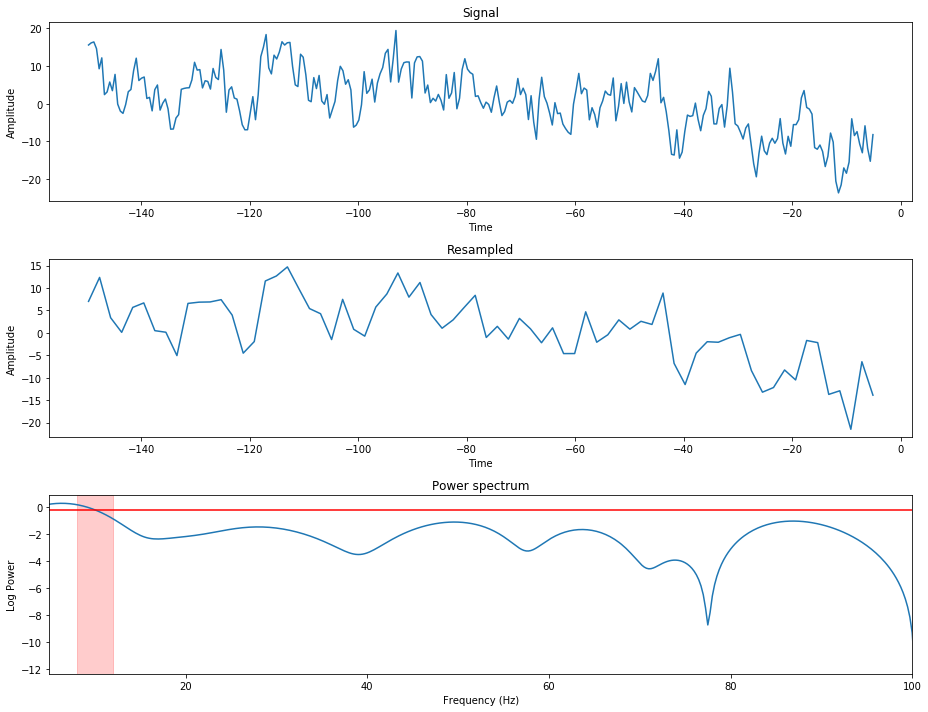

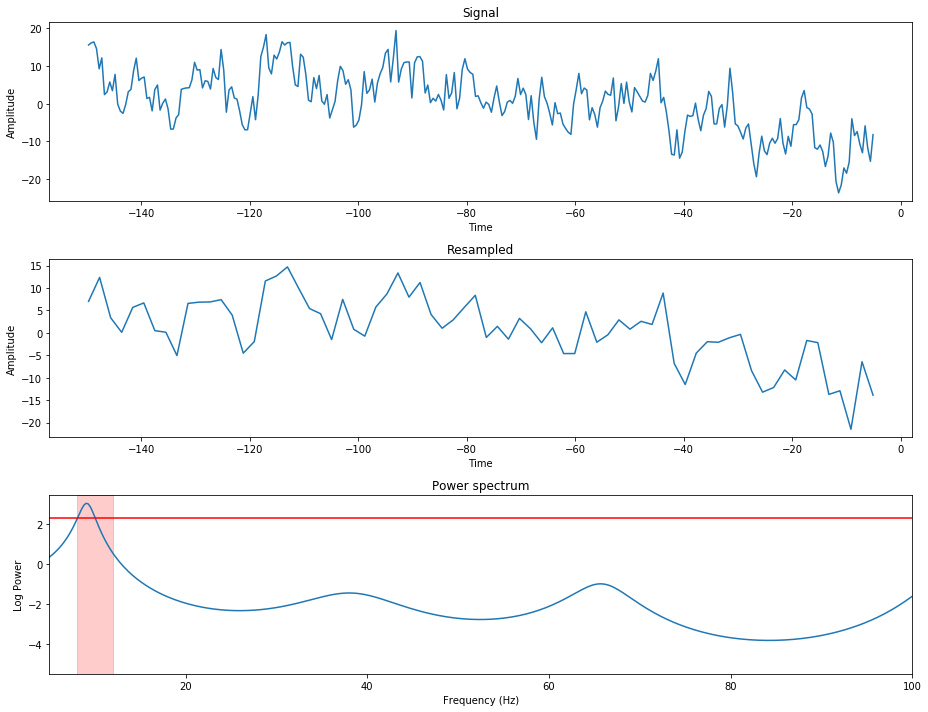

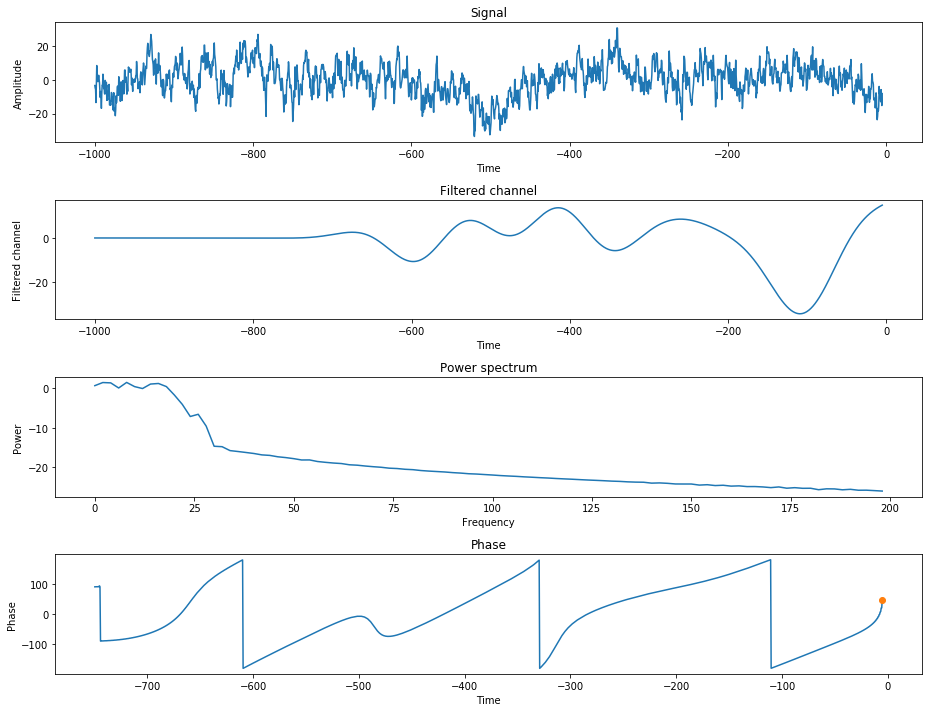

In [132]:
eeg_path = eegs[50]
print(eeg_path)
trials = read_trials_from_mat(eeg_path)
trial = trials[40]
trial = trial[trial['time'] < -5]

get_power(trial['C3'], trial['time'], [8, 12], plot=True, method='welch')
get_power(trial['C3'], trial['time'], [8, 12], plot=True, method='pburg')
# get_power(trial['C3'], trial['time'], [30, 80], plot=True)
get_phase(trial['C3'], trial['time'], [8, 12], plot=True)

# Combine EEG and others

In [133]:
def calculate_power_phase(trial, channel):    
    phase_power_dict = {}     
    phase_power_dict['theta_phase'] = get_phase(trial[channel], trial['time'], [3.5, 8])
    phase_power_dict['mu_phase'] = get_phase(trial[channel], trial['time'], [8, 12])
    phase_power_dict['beta_phase'] = get_phase(trial[channel], trial['time'], [13, 30])
    phase_power_dict['gamma_phase'] = get_phase(trial[channel], trial['time'], [30, 80])
    phase_power_dict['low_beta_phase'] = get_phase(trial[channel], trial['time'], [12, 20])
    phase_power_dict['high_beta_phase'] = get_phase(trial[channel], trial['time'], [20, 30])
    phase_power_dict['low_gamma_phase'] = get_phase(trial[channel], trial['time'], [30, 46])
    phase_power_dict['high_gamma_phase'] = get_phase(trial[channel], trial['time'], [46, 70])

    phase_power_dict['theta_power'] = get_power(trial[channel], trial['time'], [3.5, 8], crop_start_millis=-1000)
    phase_power_dict['mu_power'] = get_power(trial[channel], trial['time'], [8, 12])
    phase_power_dict['beta_power'] = get_power(trial[channel], trial['time'], [13, 30])
    phase_power_dict['gamma_power'] = get_power(trial[channel], trial['time'], [30, 80])
    phase_power_dict['low_beta_power'] = get_power(trial[channel], trial['time'], [12, 20])
    phase_power_dict['high_beta_power'] = get_power(trial[channel], trial['time'], [20, 30])
    phase_power_dict['low_gamma_power'] = get_power(trial[channel], trial['time'], [30, 46])
    phase_power_dict['high_gamma_power'] = get_power(trial[channel], trial['time'], [46, 70])
    return phase_power_dict
        
def process_trials(eeg_path):
    sub = eeg_path.split('/')[2]
    exp = eeg_path.split('/')[3]
    run = eeg_path.split('/')[5]
    
    files = glob.glob(os.path.dirname(eeg_path) + "/06-clean-prestimulus-hjorth.mat")
    if (len(files) == 0):
        return []
    
    trials = read_trials_from_mat(os.path.dirname(eeg_path) + "/06-clean-prestimulus-hjorth.mat")

    # Calculate CMAP.
    try:
        cmap_max, cmap_min = find_cmap_peaks(read_cmap(get_cmap_path(eeg_path)))
        cmap = cmap_max - cmap_min
    except:
        cmap = 0

    # Calculate MEP categories.
    try:
        mep_list = open_mep_as_df(get_mep_path(eeg_path))
        mep_sizes = []
        for mep_df in mep_list:
            size, _, _ = calculate_mep_size(mep_df)
            mep_sizes.append(size)
        mep_cmap_list = calculate_mep_categories_cmap_binary(mep_sizes, cmap)
        mep_percentile_list = calculate_mep_categories_binary(mep_sizes)
        
        df_ld = read_latency_duration(eeg_path)
        if isinstance(df_ld, pd.DataFrame) == False:
            return []
    except IndexError as e:
        print('Skipping ' + sub + '/' + exp + '/' + run + ': MEP file error')
        return []
    
    # Calculate powers and phases. And combine the results in a df list.
    power_phase_list = []
    for trial_num in range(len(trials)):
        trial = trials[trial_num]
    
        # Ignore rejected trials.
        break_loop = False
        for rejected in rejected_trials:
            if (sub == rejected['sub']) and (exp == rejected['exp']) and (rejected['run'] == run.split(' ')[2]) and ((rejected['trial'] == trial_num) or (rejected['trial'] == '*')):
                print('Rejecting ' + sub + '/' + exp + '/' + run + '/' + str(rejected['trial']))
                break_loop = True
                break
        if break_loop == True or df_ld[df_ld['trial_num'] == trial_num].shape[0] == 0:
            continue
            
        # Calculate MEP latency and duration.
        latency, duration = calculate_mep_latency_duration(mep_list[trial_num])
        if duration == 0:
            print('Skipping ' + sub + '/' + exp + '/' + run + '/' + str(trial_num) + ': because duration is 0')
            continue
        
        # Calculate phase and power.
        print('Processing ' + sub + '/' + exp + '/' + run + '/' + str(trial_num))
        try:
            if sub in ['sub13', 'sub02']:
                channel = 'C4'
            else:
                channel = 'C3'
            power = calculate_power_phase(trial, channel)
        except ValueError as e:
            print('Skipping ' + sub + '/' + exp + '/' + run + '/' + str(trial_num) + ': ' + str(e))
            continue

        power_phase_dict = power
        power_phase_dict['sub'] = sub
        power_phase_dict['exp'] = exp
        power_phase_dict['run'] = run
        power_phase_dict['trial_num'] = trial_num
        power_phase_dict['cmap'] = cmap
        power_phase_dict['mep_size'] = mep_sizes[trial_num]
        power_phase_dict['mep_cat_abs'] = get_mep_category_absolute_binary(mep_sizes[trial_num])
        power_phase_dict['mep_cat_percentile'] = mep_percentile_list[trial_num]
        power_phase_dict['mep_cat_cmap'] = mep_cmap_list[trial_num]
        power_phase_dict['mep_by_cmap'] = mep_sizes[trial_num] / cmap
        power_phase_dict['mep_latency'] = df_ld[df_ld['trial_num'] == trial_num].iloc[0]['latency']
        power_phase_dict['mep_duration'] = df_ld[df_ld['trial_num'] == trial_num].iloc[0]['duration']
        
        power_phase_dict['rejected'] = False
        for rejected in rejected_trials:
            if (sub == rejected['sub']) and (exp == rejected['exp']) and (rejected['run'] == run.split(' ')[2]) and ((rejected['trial'] == trial_num) or (rejected['trial'] == '*')):
                power_phase_dict['rejected'] = True
                break

        power_phase_list.append(power_phase_dict)
    return power_phase_list

In [134]:
num_cores = multiprocessing.cpu_count()-2
results = Parallel(n_jobs=num_cores)(delayed(process_trials)(eeg_path) for eeg_path in tqdm_notebook(eegs))

In [135]:
sub_map = {
    'sub01': 'Terry Baedon',
    'sub02': 'David Brown',
    'sub03': 'Sarah Brunet',
    'sub04': 'Lynette Gallaty',
    'sub05': 'Mana Higashihara',
    'sub06': 'Tim Howells',
    'sub07': 'Merolene Pirsarkiewicz',
    'sub08': 'Steve Vucic',
    'sub09': 'Hayeley Turnbull',
    'sub10': 'Nimeshan Geevasinga',
    'sub11': 'Amarissa M',
    'sub12': 'Marshall Owen',
    'sub13': 'Stephen Schebeci',
    'sub14': 'Matt Silsby',
    'sub15': 'Carlos Brito',
    'sub16': 'Alistair McEwan',
    'sub17': 'Toni Mathieson',
    'sub18': 'Karen Robertson',
    'sub19': 'Julie Terry',
    'sub20': 'Natalie Terry',
    'sub21': 'Raquib-ul Alam',
    'sub22': 'Lin Gavin',
}

In [136]:
df_powers = []
for result in results:
    if len(result) == 0:
        continue
    for trial in result:
        df_powers.append(trial)
len(df_powers)

df_power = pd.DataFrame(df_powers)
print(df_power.shape)

df_power['name'] = df_power.apply(lambda x: sub_map[x['sub']], axis=1)
df_power.to_excel('137-all-v1-temp.xlsx')

(550, 29)


# Remove outliers based on STD

In [93]:
df_power2 = df_power.copy()

In [94]:
# df_power2 = df_power[df_power['mep_latency'] < 0.06]
# df_power2 = df_power2[df_power2['mep_latency'] > -0.1]
# df_power2 = df_power2[np.log(df_power2['C3_theta_power']) > -4]
# df_power2 = df_power2[np.log(df_power2['C3_mu_power']) > -6]
# df_power2 = df_power2[np.log(df_power2['C3_beta_power']) > -5.5]
# df_power2 = df_power2[np.log(df_power2['C3_gamma_power']) > -6]

# df_power2 = df_power2[np.log(df_power2['C3_theta_power']) > 0]
# df_power2 = df_power2[np.log(df_power2['C3_mu_power']) > -1]
# df_power2 = df_power2[np.log(df_power2['C3_beta_power']) > -1]
# df_power2 = df_power2[np.log(df_power2['C3_gamma_power']) > -1.8]

# print(df_power2.shape)
# df_power2.to_excel('137-all-v1.xlsx')

Text(9.117999999999999, 0.5, 'mu_power')

<Figure size 720x288 with 0 Axes>

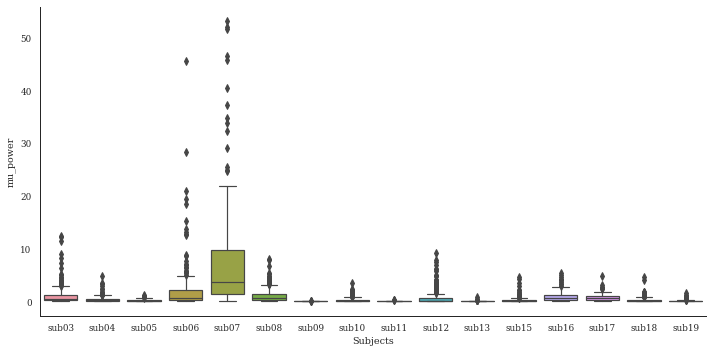

In [95]:
plt.figure(figsize=(10,4))

plt.tight_layout()
sns.set(font='serif')
sns.set_style("white", {
    "font.family": "serif",
    "font.serif": ["Times", "Palatino", "serif"]
})
sns.set_context("paper")


plot_y = 'mu_power'

sns.catplot(x="sub", y=plot_y, kind="box", data=df_power2, height=5, aspect=2)

# mean = np.mean(df_power[plot_y].values)
# std = np.std(df_power[plot_y].values)
# plt.axhline(mean)
# plt.axhspan(mean-2*std, mean+2*std, color='r', alpha=0.1)

plt.xlabel('Subjects')
plt.ylabel(plot_y)

In [96]:
df_power2['mep_size_log'] = np.log(df_power2['mep_size'])
df_power2['theta_power_log'] = np.log(df_power2['theta_power'])
df_power2['mu_power_log'] = np.log(df_power2['mu_power'])
df_power2['beta_power_log'] = np.log(df_power2['beta_power'])
df_power2['gamma_power_log'] = np.log(df_power2['gamma_power'])

def get_phase_bin(df_data, band):
    df_data[band+'_phase_bin'] = 0
    df_data.loc[(df_data[band+'_phase'] >= 45) & (df_data[band+'_phase'] <= 135), band+'_phase_bin'] = 1
    df_data.loc[(df_data[band+'_phase'] >= 225) & (df_data[band+'_phase'] <= 315), band+'_phase_bin'] = 2
    return df_data
df_power2 = get_phase_bin(df_power2, 'theta')
df_power2 = get_phase_bin(df_power2, 'mu')
df_power2 = get_phase_bin(df_power2, 'beta')
df_power2 = get_phase_bin(df_power2, 'gamma')

# df_power2.to_excel('134-hjorth-v1.xlsx')

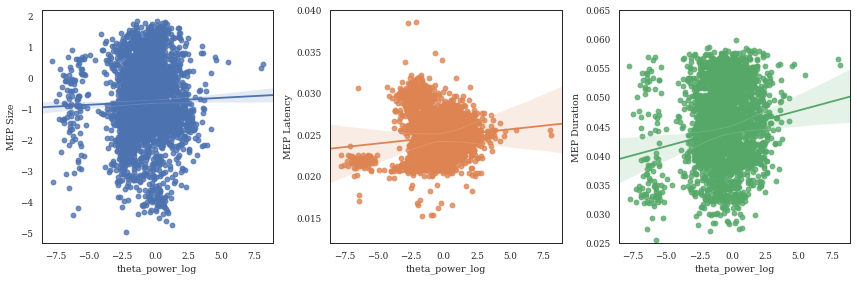

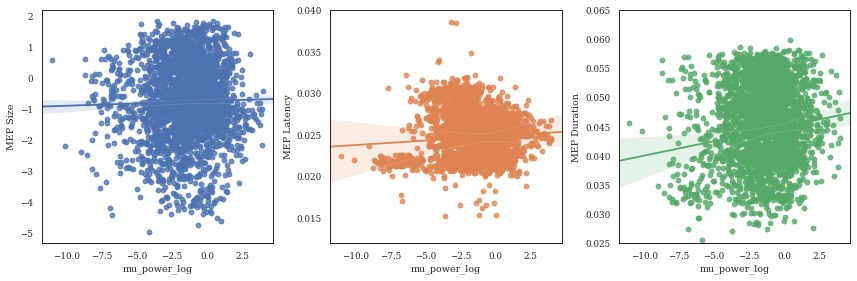

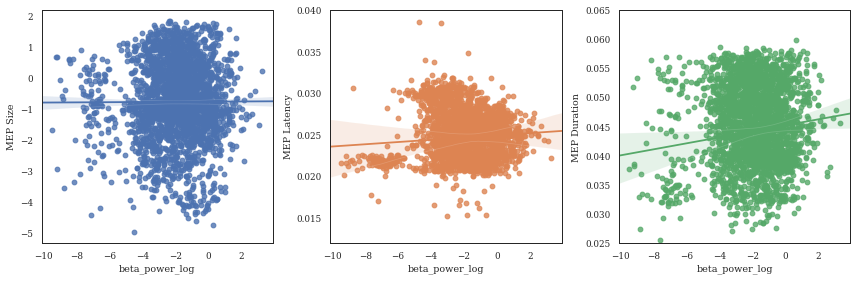

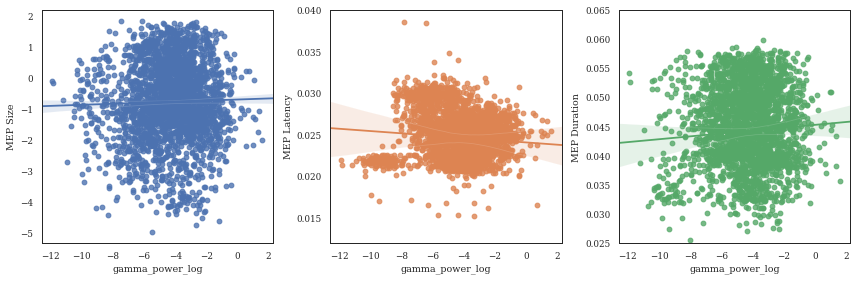

In [97]:
def plot_relations(x_label):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))
    sns.regplot(x=x_label, y="mep_size_log", data=df_power2, ax=ax1)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel('MEP Size')

    sns.regplot(x=x_label, y="mep_latency", data=df_power2, ax=ax2)
    ax2.set_xlabel(x_label)
    ax2.set_ylabel('MEP Latency')
    ax2.set_ylim(0.012, 0.04)

    sns.regplot(x=x_label, y="mep_duration", data=df_power2, ax=ax3)
    ax3.set_xlabel(x_label)
    ax3.set_ylabel('MEP Duration')
    ax3.set_ylim(0.025, 0.065)
    plt.tight_layout()
    
plot_relations('theta_power_log')
plot_relations('mu_power_log')
plot_relations('beta_power_log')
plot_relations('gamma_power_log')

Text(0, 0.5, 'MEP Latency')

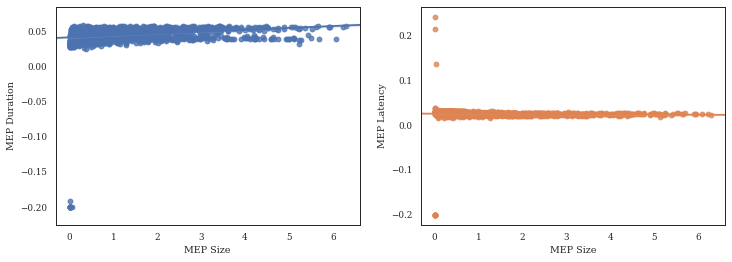

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.regplot(x="mep_size", y="mep_duration", data=df_power2, ax=ax1)
ax1.set_xlabel('MEP Size')
ax1.set_ylabel('MEP Duration')

sns.regplot(x="mep_size", y="mep_latency", data=df_power2, ax=ax2)
ax2.set_xlabel('MEP Size')
ax2.set_ylabel('MEP Latency')

In [99]:
rej = df_power2[(df_power2['mep_size'] > 2.5) & (df_power2['mep_duration'] > 0.035) & (df_power2['mep_duration'] < 0.05)]
rej[['sub', 'exp', 'run', 'trial_num', 'mep_size_log', 'mep_duration', 'mep_latency']].head(20)

,sub,exp,run,trial_num,mep_size_log,mep_duration,mep_latency
47,sub03,exp01,SP 110RMT r1,47,1.024808,0.0386,0.0200
116,sub03,exp01,SP 110RMT r3,16,0.998509,0.0376,0.0220
313,sub04,exp01,SP 110RMT r1,13,0.960466,0.0466,0.0220
333,sub04,exp01,SP 110RMT r1,33,0.935334,0.0456,0.0222
578,sub06,exp01,SP 110RMT r2,28,1.173232,0.0492,0.0232
606,sub06,exp01,SP 110RMT r3,6,1.111559,0.0498,0.0240
620,sub06,exp01,SP 110RMT r3,20,1.089682,0.0486,0.0242
850,sub07,exp01,SP 110RMT r3,49,1.034128,0.0376,0.0240
902,sub08,exp01,SP 110RMT r2,1,1.413969,0.0398,0.0252
904,sub08,exp01,SP 110RMT r2,3,1.096994,0.0404,0.0252


In [100]:
df_power2.shape

(2558, 39)

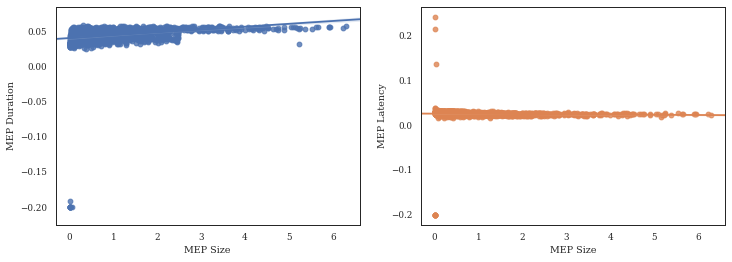

In [210]:
df_power3 = df_power2[~df_power2.index.isin(rej.index)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.regplot(x="mep_size", y="mep_duration", data=df_power3, ax=ax1)
ax1.set_xlabel('MEP Size')
ax1.set_ylabel('MEP Duration')

sns.regplot(x="mep_size", y="mep_latency", data=df_power3, ax=ax2)
ax2.set_xlabel('MEP Size')
ax2.set_ylabel('MEP Latency')
df_power3.to_excel('134-hjorth-v1.xlsx')

In [211]:
df_power.sort_values(by='mep_latency', ascending='True')[['sub', 'exp', 'run', 'trial_num', 'mep_duration', 'mep_size', 'mep_latency']].head(10)

,sub,exp,run,trial_num,mep_duration,mep_size,mep_latency
1200,sub09,exp01,SP 110RMT r1,0,-0.2000,0.011749,-0.2000
1603,sub12,exp02,SP 110RMT r1,44,-0.1920,0.022888,-0.2000
1573,sub12,exp02,SP 110RMT r1,14,-0.2000,0.021515,-0.2000
1506,sub12,exp01,SP 110RMT r1,0,-0.2000,0.014801,-0.2000
1994,sub15,exp01,SP 110RMT r2,36,-0.2000,0.006866,-0.2000
2172,sub16,exp01,SP 110RMT r3,14,-0.2000,0.009918,-0.2000
1050,sub08,exp03,SP 110RMT r1,0,-0.2000,0.008697,-0.2000
461,sub05,exp01,SP 110RMT r3,11,0.0298,0.087280,0.0152
240,sub03,exp03,SP 110RMT r2,40,0.0458,0.419769,0.0154
601,sub06,exp01,SP 110RMT r3,1,0.0464,1.272888,0.0154


In [212]:
df_power.sort_values(by='mep_duration', ascending='True')[['sub', 'exp', 'run', 'trial_num', 'mep_duration', 'mep_size', 'mep_latency']].head(5)

,sub,exp,run,trial_num,mep_duration,mep_size,mep_latency
1595,sub12,exp02,SP 110RMT r1,36,-0.2,0.021973,0.2406
2208,sub17,exp01,SP 110RMT r1,0,-0.2,0.048371,0.1360
1200,sub09,exp01,SP 110RMT r1,0,-0.2,0.011749,-0.2000
1573,sub12,exp02,SP 110RMT r1,14,-0.2,0.021515,-0.2000
1050,sub08,exp03,SP 110RMT r1,0,-0.2,0.008697,-0.2000


In [213]:
def remove_outliers(df_data, channel = 'C3'):
    mu_power_mean = np.mean(df_data[channel + '_mu_power'])
    mu_power_std = np.std(df_data[channel + '_mu_power'])
    beta_power_mean = np.mean(df_data[channel + '_beta_power'])
    beta_power_std = np.std(df_data[channel + '_beta_power'])
    gamma_power_mean = np.mean(df_data[channel + '_gamma_power'])
    gamma_power_std = np.std(df_data[channel + '_gamma_power'])
    theta_power_mean = np.mean(df_data[channel + '_theta_power'])
    theta_power_std = np.std(df_data[channel + '_theta_power'])

    mep_size_mean = np.mean(df_data['mep_size'])
    mep_size_std = np.std(df_data['mep_size'])
    mep_duration_mean = np.mean(df_data['mep_duration'])
    mep_duration_std = np.std(df_data['mep_duration'])
    mep_latency_mean = np.mean(df_data['mep_latency'])
    mep_latency_std = np.std(df_data['mep_latency'])

    df_powers2 = []
    for idx, row in tqdm_notebook(df_data.iterrows(), total=df_data.shape[0]):
        if (
#             row[channel + '_mu_power'] > mu_power_mean + 2 * mu_power_std or row[channel + '_mu_power'] < mu_power_mean - 2 * mu_power_std or 
#             row[channel + '_beta_power'] > beta_power_mean + 2 * beta_power_std or row[channel + '_beta_power'] < beta_power_mean - 2 * beta_power_std or 
#             row[channel + '_gamma_power'] > gamma_power_mean + 2 * gamma_power_std or row[channel + '_gamma_power'] < gamma_power_mean - 2 * gamma_power_std or 
#             row[channel + '_theta_power'] > theta_power_mean + 2 * theta_power_std or row[channel + '_theta_power'] < theta_power_mean - 2 * theta_power_std or 
#             row['mep_size'] > mep_size_mean + 2 * mep_size_std or row['mep_size'] < mep_size_mean - 2 * mep_size_std or
            row['mep_duration'] > mep_duration_mean + 2 * mep_duration_std or row['mep_duration'] < mep_duration_mean - 2 * mep_duration_std or
            row['mep_latency'] > mep_latency_mean + 2 * mep_latency_std or row['mep_latency'] < mep_latency_mean - 2 * mep_latency_std):
            i = 1
        else:
            df_powers2.append(row)                
    df_powers2 = pd.DataFrame(df_powers2)
    return df_powers2

In [214]:
df_powers2 = remove_outliers(df_power)
print(df_powers2.shape)
df_powers2.to_excel('134-ft-hjorth-no-outlier-v1.xlsx')

KeyError: 'C3_mu_power'

In [ ]:
df_powers2['sub']

In [ ]:
def remove_outliers_sub(df_data):
    df_data2 = []
    for sub in df_data['sub'].unique():
        df_new = df_data[df_data['sub'] == sub]
        mep_size_mean = np.mean(df_new['mep_size'])
        mep_size_std = np.std(df_new['mep_size'])
        for idx, row in df_new.iterrows():
            if row['mep_size'] < mep_size_mean + 2 * mep_size_std and row['mep_size'] > mep_size_mean - 2 * mep_size_std:
                df_data2.append(row)
    df_data2 = pd.DataFrame(df_data2)
    return df_data2

df_powers3 = remove_outliers_sub(df_powers2)
print(df_powers3.shape)
df_powers3.to_excel('134-ft-hjorth-no-outlier-sub-v1.xlsx')

In [ ]:
df_powers2['mep_latency'].hist()

In [ ]:
np.log(df_powers2['mep_duration']).hist()

# Plot

Text(0, 0.5, 'MEP Duration')

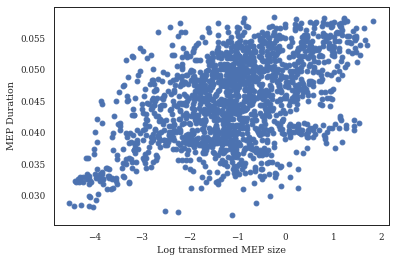

In [188]:
plt.plot(df_all['mep_size_log'], df_all['mep_duration'], 'o')
plt.xlabel('Log transformed MEP size')
plt.ylabel('MEP Duration')

Text(0, 0.5, 'MEP Latency')

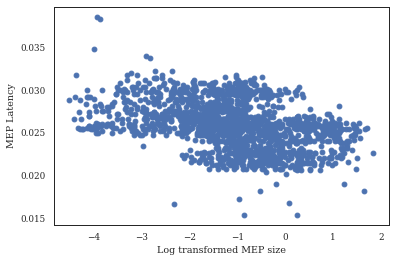

In [186]:
plt.plot(df_all['mep_size_log'], df_all['mep_latency'], 'o')
plt.xlabel('Log transformed MEP size')
plt.ylabel('MEP Latency')

Text(7.3679999999999986, 0.5, 'Log transformed MEP Size')

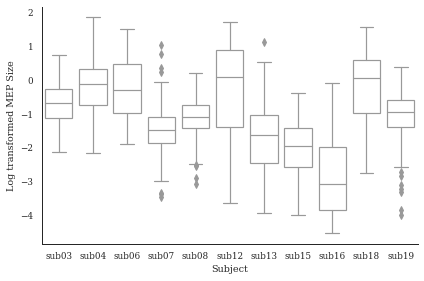

In [184]:
df_all['mep_size_log'] = np.log(df_all['mep_size'])
sns.catplot(x="sub", y='mep_size_log', kind="box", data=df_all, height=4, aspect=1.5, color='w')
plt.xlabel('Subject')
plt.ylabel('Log transformed MEP Size')

In [156]:
df_all = df_all[df_all['mep_duration'] > 0]

In [189]:
df_all = pd.read_excel('137-all-v2-pburg.xlsx')
df_tf = []
for idx, row in df_all.iterrows():
    df_tf.append({
        'sub': row['sub'],
        'mep': row['mep_size_log'],
        'Band': 'Theta'
    })
    df_tf.append({
        'sub': row['sub'],
        'power': row['mu_power'],
        'Band': 'Mu',
    })
    df_tf.append({
        'sub': row['sub'],
        'power': row['beta_power'],
        'Band': 'Beta',
    })
    df_tf.append({
        'sub': row['sub'],
        'power': row['gamma_power'],
        'Band': 'Gamma'
    })
df_tf = pd.DataFrame(df_tf)
df_tf['power'] = np.log(df_tf['power'])
sns.catplot(x="sub", y='power', hue='Band', kind="box", data=df_tf, height=4, aspect=2)
plt.xlabel('Subject')
plt.ylabel('Power density')

KeyError: 'mep_size_log'

Text(24.504808359375005, 0.5, 'Power density')

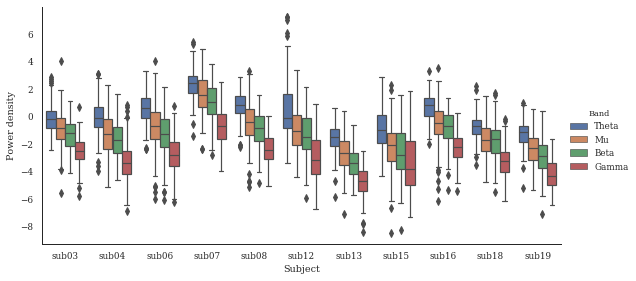

In [180]:
df_all = pd.read_excel('137-all-v2-pburg.xlsx')
df_tf = []
for idx, row in df_all.iterrows():
    df_tf.append({
        'sub': row['sub'],
        'power': row['theta_power'],
        'Band': 'Theta'
    })
    df_tf.append({
        'sub': row['sub'],
        'power': row['mu_power'],
        'Band': 'Mu',
    })
    df_tf.append({
        'sub': row['sub'],
        'power': row['beta_power'],
        'Band': 'Beta',
    })
    df_tf.append({
        'sub': row['sub'],
        'power': row['gamma_power'],
        'Band': 'Gamma'
    })
df_tf = pd.DataFrame(df_tf)
df_tf['power'] = np.log(df_tf['power'])
sns.catplot(x="sub", y='power', hue='Band', kind="box", data=df_tf, height=4, aspect=2)
plt.xlabel('Subject')
plt.ylabel('Power density')

In [148]:
df_all = pd.read_excel('137-all-v2-pburg.xlsx')
df_all['sub_name'] = df_all.apply(lambda x: x['sub'] + ' ' + x['name'], axis=1)
df_all = df_all[~df_all['sub'].isin(['sub05', 'sub09', 'sub11', 'sub17'])]
df_all = df_all[df_all['mep_duration'] > 0]
df_all = df_all[df_all['mep_latency'] < 0.1]
df_all = df_all[df_all['mep_latency'] >-0.1]
print(df_all.shape)
df_all['theta_power_log'] = np.log(df_all['theta_power'])
df_all['mu_power_log'] = np.log(df_all['mu_power'])
df_all['beta_power_log'] = np.log(df_all['beta_power'])
df_all['gamma_power_log'] = np.log(df_all['gamma_power'])
df_all['mep_size_log'] = np.log(df_all['mep_size'])
df_all.to_excel('137-all-v2.xlsx')

(1645, 34)


In [158]:
df_all = pd.read_excel('137-all-v2-pburg.xlsx')
df_all = df_all[~df_all['sub'].isin(['sub05', 'sub09', 'sub11', 'sub17'])]
df_all.to_excel('137-all-v2-pburg.xlsx')

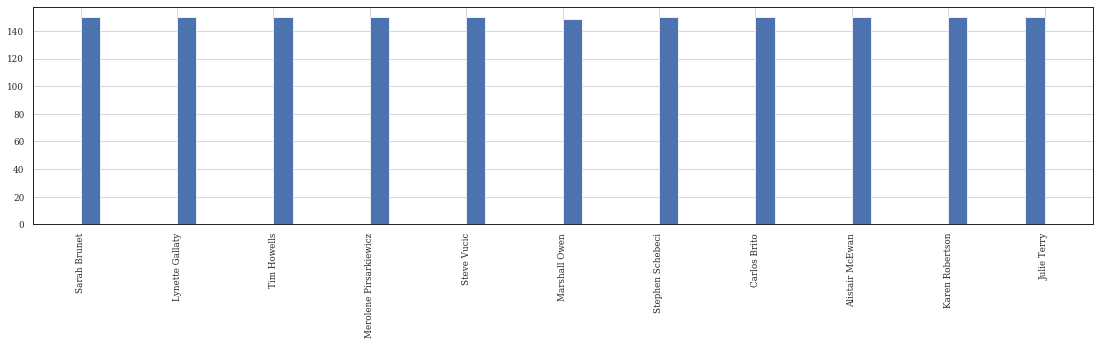

In [154]:
ax = df_all['name'].hist(figsize=(19,4), xrot=90, bins=50, align='mid')

Text(0, 0.5, 'MEP Latency')

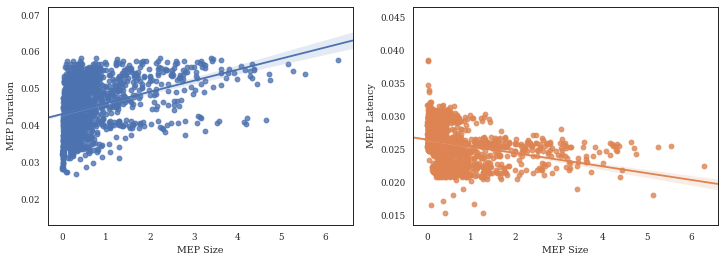

In [157]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.regplot(x="mep_size", y="mep_duration", data=df_all, ax=ax1)
ax1.set_xlabel('MEP Size')
ax1.set_ylabel('MEP Duration')

sns.regplot(x="mep_size", y="mep_latency", data=df_all, ax=ax2)
ax2.set_xlabel('MEP Size')
ax2.set_ylabel('MEP Latency')

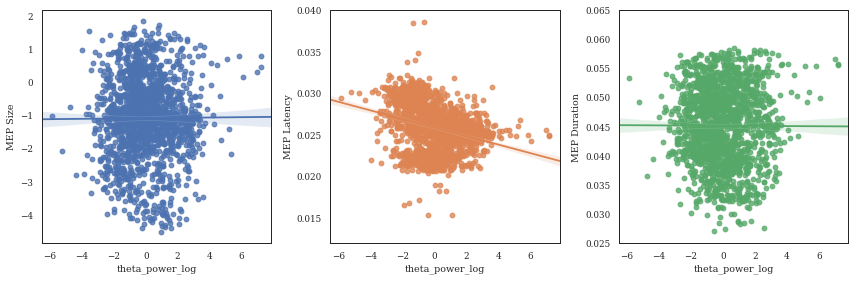

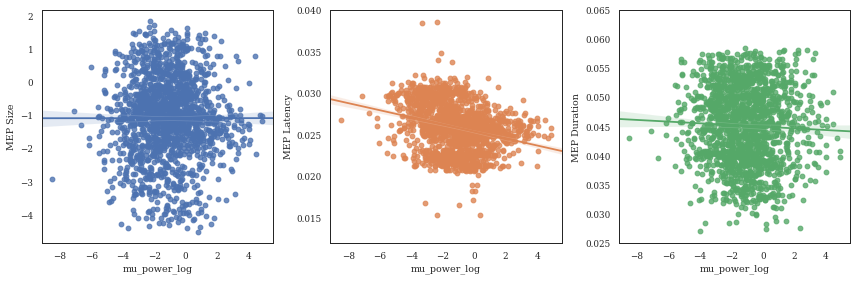

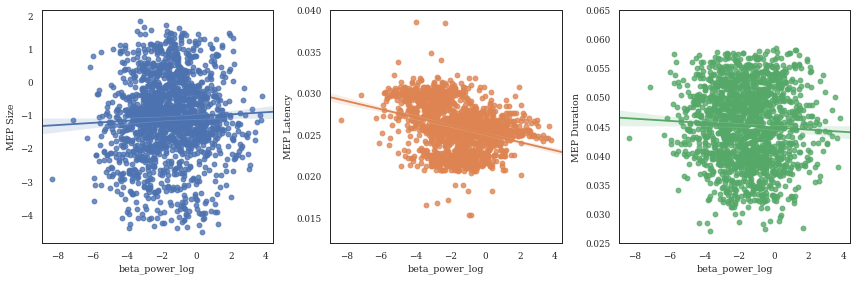

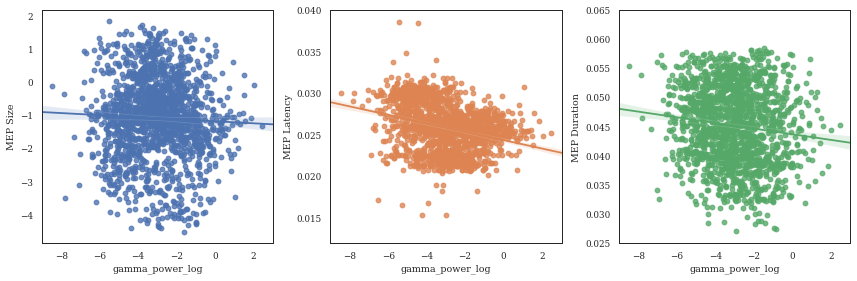

In [151]:
def plot_relations(x_label, df):
    fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(12,4))
    sns.regplot(x=x_label, y="mep_size_log", data=df, ax=ax1)
    ax1.set_xlabel(x_label)
    ax1.set_ylabel('MEP Size')

    sns.regplot(x=x_label, y="mep_latency", data=df, ax=ax2)
    ax2.set_xlabel(x_label)
    ax2.set_ylabel('MEP Latency')
    ax2.set_ylim(0.012, 0.04)

    sns.regplot(x=x_label, y="mep_duration", data=df, ax=ax3)
    ax3.set_xlabel(x_label)
    ax3.set_ylabel('MEP Duration')
    ax3.set_ylim(0.025, 0.065)
    plt.tight_layout()
    
plot_relations('theta_power_log', df_all)
plot_relations('mu_power_log', df_all)
plot_relations('beta_power_log', df_all)
plot_relations('gamma_power_log', df_all)

In [127]:
# df_all.to_excel('137-all-v2.xlsx')
df_all2 = df_all.copy()

In [128]:
df_all2.columns

Index(['Unnamed: 0', 'sub', 'name', 'exp', 'run', 'trial_num', 'beta_phase',
       'beta_power', 'cmap', 'gamma_phase', 'gamma_power', 'high_beta_phase',
       'high_beta_power', 'high_gamma_phase', 'high_gamma_power',
       'low_beta_phase', 'low_beta_power', 'low_gamma_phase',
       'low_gamma_power', 'mep_by_cmap', 'mep_cat_abs', 'mep_cat_cmap',
       'mep_cat_percentile', 'mep_duration', 'mep_latency', 'mep_size',
       'mu_phase', 'mu_power', 'rejected', 'theta_phase', 'theta_power',
       'sub_name', 'theta_power_log', 'mu_power_log', 'beta_power_log',
       'gamma_power_log', 'mep_size_log'],
      dtype='object')

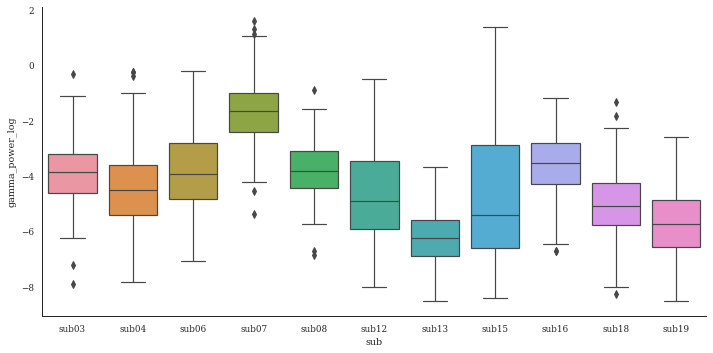

In [129]:
# df_all2 = df_all[~df_all['sub'].isin(['sub07'])]
sns.catplot(x="sub", y='gamma_power_log', kind="box", data=df_all2, height=5, aspect=2)
df_all2.to_excel('137-all-v3.xlsx')

# Plot

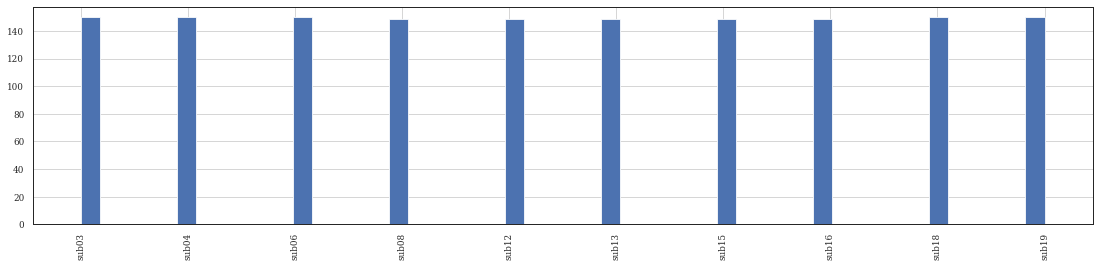

In [337]:
df_all3 = pd.read_excel('137-all-v3.xlsx')
df_all3['sub'].hist(figsize=(19,4), xrot=90, bins=50, align='mid')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f084c2bb7f0>]],
      dtype=object)

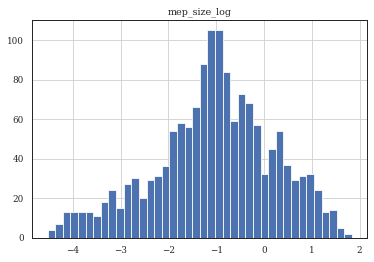

In [343]:
df_all3.hist('mep_size_log', bins=40)